In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")

In [2]:
merged = pd.read_excel("final_movie_analysis.xlsx")

In [3]:
total_movies = len(merged)
success_rate = merged['Success'].mean() * 100
avg_rating = merged['averageRating'].mean()
avg_sentiment = merged['avg_sentiment'].mean()
avg_review_index = merged['Review_Index'].mean()

print("===== MOVIE ANALYTICS DASHBOARD =====\n")
print(f"Total Movies: {total_movies}")
print(f"Success Rate (Rating ≥ 7): {success_rate:.2f}%")
print(f"Average IMDb Rating: {avg_rating:.2f}")
print(f"Average Sentiment Score: {avg_sentiment:.2f}")
print(f"Average Review Index: {avg_review_index:.2f}")

===== MOVIE ANALYTICS DASHBOARD =====

Total Movies: 537
Success Rate (Rating ≥ 7): 66.29%
Average IMDb Rating: 7.26
Average Sentiment Score: 0.61
Average Review Index: 0.73


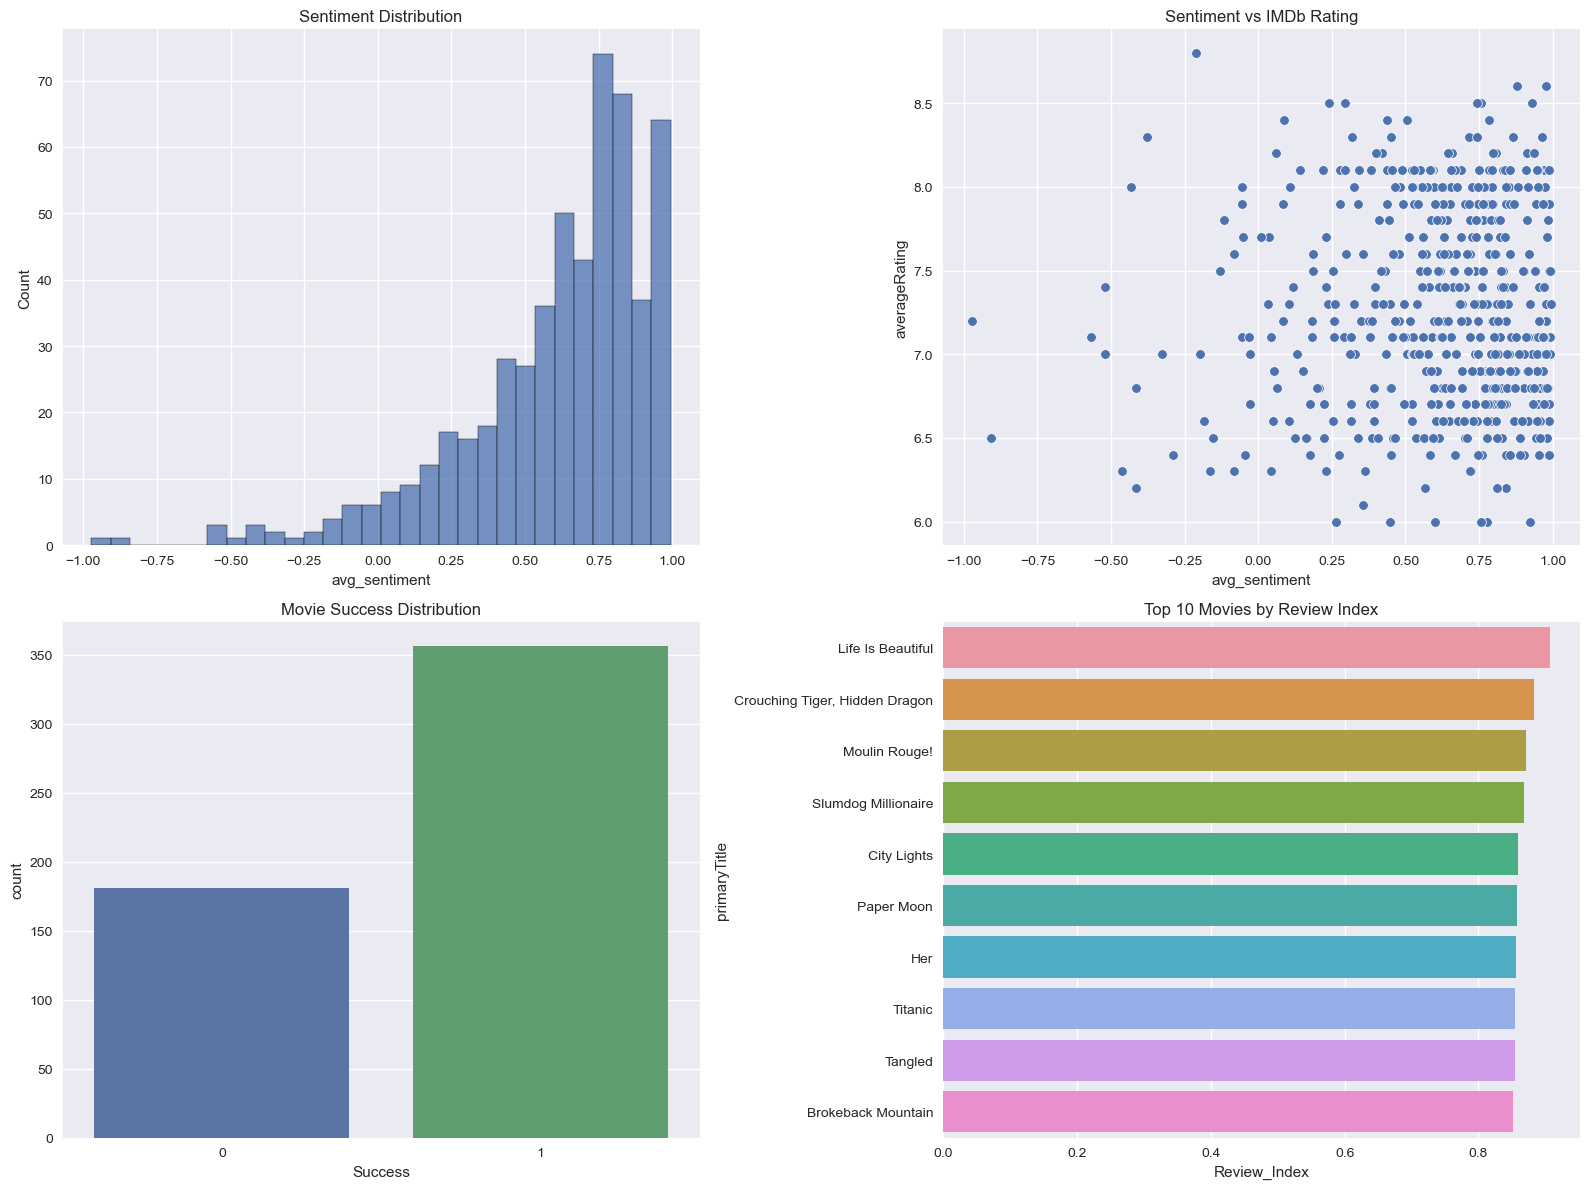

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1️⃣ Sentiment Distribution
sns.histplot(merged['avg_sentiment'], bins=30, ax=axes[0,0])
axes[0,0].set_title("Sentiment Distribution")

# 2️⃣ Rating vs Sentiment
sns.scatterplot(data=merged, 
                x='avg_sentiment', 
                y='averageRating', 
                ax=axes[0,1])
axes[0,1].set_title("Sentiment vs IMDb Rating")

# 3️⃣ Success Distribution
sns.countplot(x='Success', data=merged, ax=axes[1,0])
axes[1,0].set_title("Movie Success Distribution")

# 4️⃣ Top 10 Movies by Review Index
top10 = merged.sort_values(by='Review_Index', ascending=False).head(10)
sns.barplot(x='Review_Index', y='primaryTitle', data=top10, ax=axes[1,1])
axes[1,1].set_title("Top 10 Movies by Review Index")

plt.tight_layout()
plt.show()

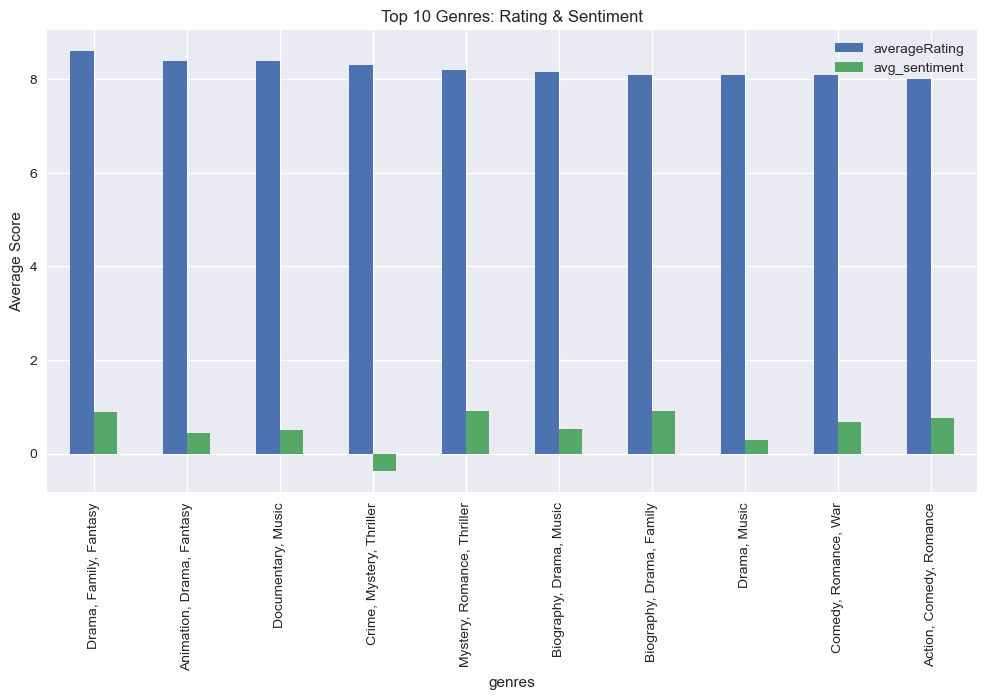

In [5]:
genre_performance = merged.groupby('genres').agg({
    'averageRating':'mean',
    'avg_sentiment':'mean'
}).sort_values(by='averageRating', ascending=False).head(10)

genre_performance.plot(kind='bar', figsize=(12,6))
plt.title("Top 10 Genres: Rating & Sentiment")
plt.ylabel("Average Score")
plt.show()

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Define features and target again
features_class = merged[['numVotes', 'runtimeMinutes', 
                         'avg_sentiment', 'Review_Index']]

target_class = merged['Success']

# Remove missing values
data_class = pd.concat([features_class, target_class], axis=1).dropna()

X = data_class[['numVotes', 'runtimeMinutes', 
                'avg_sentiment', 'Review_Index']]
y = data_class['Success']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

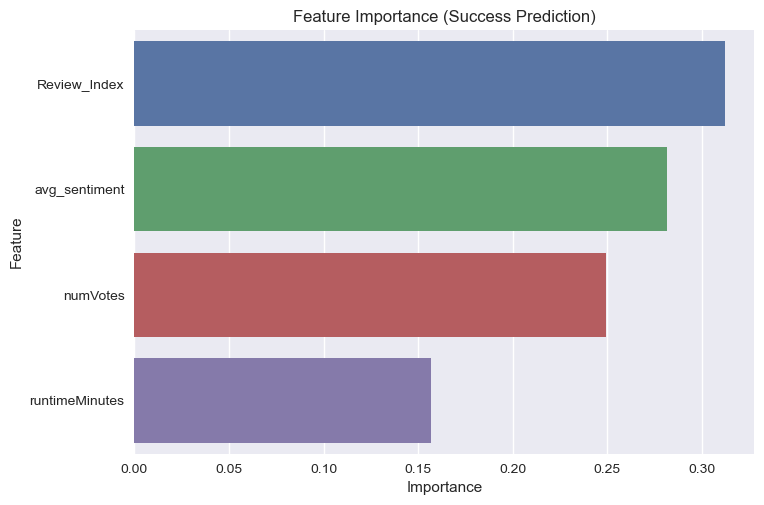

In [8]:
importances = clf.feature_importances_

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title("Feature Importance (Success Prediction)")
plt.show()